In [1217]:
import numpy as np
import pandas as pd
import os
import warnings; warnings.simplefilter('ignore')

import matplotlib as plt
import seaborn as sns
from sklearn.metrics import r2_score


# initial import (monthly and annual data)
df_annual = pd.read_csv('/Users/alexanderblaies/Desktop/python-virtual-environments/2nd_Capstone_Repo/data/raw/London_Real_Estate_Data/housing_in_london_yearly_variables.csv')

# initial inspection and showcasing the datatypes of each column for the annual csv file
# changing the mean salary and recycling columns into floats; also, changing the date column into date-time format
df_annual['date'] = pd.to_datetime(df_annual['date'])
df_annual['mean_salary'] = pd.to_numeric(df_annual['mean_salary'], errors = "coerce")
df_annual['recycling_pct'] = pd.to_numeric(df_annual['recycling_pct'], errors = "coerce")

df_annual.info()
print(df_annual.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   code               1071 non-null   object        
 1   area               1071 non-null   object        
 2   date               1071 non-null   datetime64[ns]
 3   median_salary      1049 non-null   float64       
 4   life_satisfaction  352 non-null    float64       
 5   mean_salary        1054 non-null   float64       
 6   recycling_pct      859 non-null    float64       
 7   population_size    1018 non-null   float64       
 8   number_of_jobs     931 non-null    float64       
 9   area_size          666 non-null    float64       
 10  no_of_houses       666 non-null    float64       
 11  borough_flag       1071 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 100.5+ KB
(1071, 12)


In [1218]:
df_annual.head(25)

,code,area,date,median_salary,life_satisfaction,mean_salary,recycling_pct,population_size,number_of_jobs,area_size,no_of_houses,borough_flag
0,E09000001,city of london,1999-12-01,33020.0,NaN,48922.0,0.0,6581.0,NaN,NaN,NaN,1
1,E09000002,barking and dagenham,1999-12-01,21480.0,NaN,23620.0,3.0,162444.0,NaN,NaN,NaN,1
2,E09000003,barnet,1999-12-01,19568.0,NaN,23128.0,8.0,313469.0,NaN,NaN,NaN,1
3,E09000004,bexley,1999-12-01,18621.0,NaN,21386.0,18.0,217458.0,NaN,NaN,NaN,1
4,E09000005,brent,1999-12-01,18532.0,NaN,20911.0,6.0,260317.0,NaN,NaN,NaN,1
5,E09000006,bromley,1999-12-01,16720.0,NaN,21293.0,13.0,294902.0,NaN,NaN,NaN,1
6,E09000007,camden,1999-12-01,23677.0,NaN,30249.0,13.0,190003.0,NaN,NaN,NaN,1
7,E09000008,croydon,1999-12-01,19563.0,NaN,22205.0,13.0,332066.0,NaN,NaN,NaN,1
8,E09000009,ealing,1999-12-01,20580.0,NaN,25046.0,12.0,302252.0,NaN,NaN,NaN,1
9,E09000010,enfield,1999-12-01,19289.0,NaN,21006.0,9.0,272731.0,NaN,NaN,NaN,1


In [1219]:
# Initial inspection of the data to determine what values are missing; as you will be able to see, there is quite a bit of cleanup that needs to be done
total_missing_annual = df_annual.isnull().sum()
total_missing_percentage_annual = df_annual.isnull().mean() * 100
missing_annual = pd.DataFrame({'count':total_missing_annual, '%':total_missing_percentage_annual})
missing_annual.head(12)

,count,%
code,0,0.000000
area,0,0.000000
date,0,0.000000
median_salary,22,2.054155
life_satisfaction,719,67.133520
mean_salary,17,1.587302
recycling_pct,212,19.794585
population_size,53,4.948646
number_of_jobs,140,13.071895
area_size,405,37.815126


In [1220]:
# Now, it's time to address missing/NaN values
# As we can see from above, it makes sense drop the 'life_satisfaction' column as the data is incomplete/sporadic
del df_annual['life_satisfaction']
print(df_annual.columns)

Index(['code', 'area', 'date', 'median_salary', 'mean_salary', 'recycling_pct',
       'population_size', 'number_of_jobs', 'area_size', 'no_of_houses',
       'borough_flag'],
      dtype='object')


In [1221]:
# For the median_salary, mean_salary and population_size columns, it makes sense to impute via a linear trend
df_annual.mean_salary.interpolate(method = 'linear', inplace = True)
df_annual.median_salary.interpolate(method = 'linear', inplace = True)
df_annual.population_size.interpolate(method = 'linear', inplace = True)

# confirming that the NaN values have been taken care off
print(df_annual['mean_salary'].isnull().sum())
print(df_annual['median_salary'].isnull().sum())
print(df_annual['population_size'].isnull().sum())

0
0
0


array([[<AxesSubplot:title={'center':'median_salary'}>,
        <AxesSubplot:title={'center':'mean_salary'}>,
        <AxesSubplot:title={'center':'recycling_pct'}>],
       [<AxesSubplot:title={'center':'population_size'}>,
        <AxesSubplot:title={'center':'number_of_jobs'}>,
        <AxesSubplot:title={'center':'area_size'}>],
       [<AxesSubplot:title={'center':'no_of_houses'}>,
        <AxesSubplot:title={'center':'borough_flag'}>, <AxesSubplot:>]],
      dtype=object)

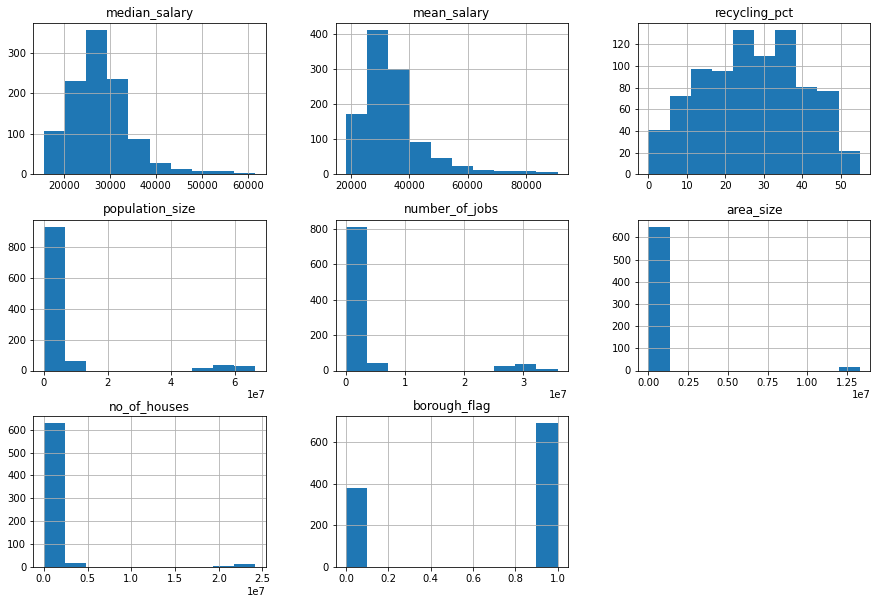

In [1222]:
# Now, let's go ahead and visualize the statistical distributions for each feature
df_annual.hist(figsize = (15,10))

# The curves for median_salary, mean_salary, recycling_pct and borough_flag are sufficient; the data for the population_size, number_of_jobs, area_size and population_size need to be investigated more
# for population_size, number_of_jobs, area_size and no_of_houses, we seem to have some outlier and potentially erroneous data points; I'll inspect these later

In [1223]:
# First, let's make sure all boroughs are accounted for
total_unique_areas = df_annual['area'].nunique()
total_unique_boroughs = df_annual[df_annual['borough_flag'] == 1]['area'].nunique()
total_unique_non_b = total_unique_areas - total_unique_boroughs
print({'areas': total_unique_areas, 'boroughs': total_unique_boroughs, 'non-boroughs':total_unique_non_b})

{'areas': 51, 'boroughs': 33, 'non-boroughs': 18}


In [1224]:
# making a list of each; again, it looks like the city of london is mislabeled
b_test = df_annual['borough_flag'] == 1
df_annual_b = df_annual[b_test]
df_annual_nonb = df_annual[~b_test]
print(df_annual_b.area.unique())

['city of london' 'barking and dagenham' 'barnet' 'bexley' 'brent'
 'bromley' 'camden' 'croydon' 'ealing' 'enfield' 'greenwich' 'hackney'
 'hammersmith and fulham' 'haringey' 'harrow' 'havering' 'hillingdon'
 'hounslow' 'islington' 'kensington and chelsea' 'kingston upon thames'
 'lambeth' 'lewisham' 'merton' 'newham' 'redbridge' 'richmond upon thames'
 'southwark' 'sutton' 'tower hamlets' 'waltham forest' 'wandsworth'
 'westminster']


In [1225]:
# it appears as though the 'city of london' is not classified correctly, so let's go ahead and account for that 
extract_city = df_annual_b[df_annual_b['area'] == 'city of london']
print(extract_city.head(4))
print(extract_city.shape)
# looks good for extraction

          code            area       date  median_salary  mean_salary  \
0    E09000001  city of london 1999-12-01        33020.0      48922.0   
51   E09000001  city of london 2000-12-01        34903.0      52203.0   
102  E09000001  city of london 2001-12-01        39104.0      62819.0   
153  E09000001  city of london 2002-12-01        39750.0      56450.0   

     recycling_pct  population_size  number_of_jobs  area_size  no_of_houses  \
0              0.0           6581.0             NaN        NaN           NaN   
51             0.0           7014.0        361000.0        NaN           NaN   
102            0.0           7359.0        339000.0      315.0        5009.0   
153            1.0           7280.0        344000.0      315.0        5117.0   

     borough_flag  
0               1  
51              1  
102             1  
153             1  
(21, 11)


In [1226]:
# deleting the city_of_london data from the annual_b dataframe
df_annual_b.drop(extract_city.index, inplace = True)
print(df_annual_b.area.unique())
print(df_annual_b.shape)

['barking and dagenham' 'barnet' 'bexley' 'brent' 'bromley' 'camden'
 'croydon' 'ealing' 'enfield' 'greenwich' 'hackney'
 'hammersmith and fulham' 'haringey' 'harrow' 'havering' 'hillingdon'
 'hounslow' 'islington' 'kensington and chelsea' 'kingston upon thames'
 'lambeth' 'lewisham' 'merton' 'newham' 'redbridge' 'richmond upon thames'
 'southwark' 'sutton' 'tower hamlets' 'waltham forest' 'wandsworth'
 'westminster']
(672, 11)


In [1227]:
# appending the city of london data to the the df_monthly_nonb dataframe
df_annual_nonb = df_annual_nonb.append(extract_city)
# adding the 399 + 672 = 1071; this summation indicates that all records are accounted for
# after comparing the names shown below to the ones from the monthly dataframes, I'm going to change 'yorkshire and the humber' to 'yorks and the humber' in order to maintain consistency
df_annual_nonb.loc[df_annual_nonb.area == 'yorkshire and the humber'] = "yorks and the humber"
print(df_annual_nonb.area.unique())
print(df_annual_nonb.shape)

['north east' 'north west' 'yorks and the humber' 'east midlands'
 'west midlands' 'east' 'london' 'south east' 'south west' 'inner london'
 'outer london' 'england' 'united kingdom' 'great britain'
 'england and wales' 'northern ireland' 'scotland' 'wales'
 'city of london']
(399, 11)


In [1228]:
# Filtering to do a more granular inspection of the annual data by focusing on a singular borough; it looks like we have annual data for each year for 20 years
df_barnet = df_annual_b.loc[df_annual_b.area == "barnet"]
# inspecting the Barnet mean salaries to determine the delta; will apply this "feature engineering" to the monthly and annual datasets; this is just a sample calculation
df_barnet["mean_salary_yoy_delta$"] = df_barnet['mean_salary'].diff(1).fillna(0)  
print(df_barnet)

           code    area       date  median_salary  mean_salary  recycling_pct  \
2     E09000003  barnet 1999-12-01        19568.0      23128.0            8.0   
53    E09000003  barnet 2000-12-01        21761.0      25755.0            8.0   
104   E09000003  barnet 2001-12-01        20916.0      26068.0            8.0   
155   E09000003  barnet 2002-12-01        23112.0      30210.0           13.0   
206   E09000003  barnet 2003-12-01        23828.0      30518.0           16.0   
257   E09000003  barnet 2004-12-01        23517.5      30795.0           20.0   
308   E09000003  barnet 2005-12-01        27033.0      31652.0           27.0   
359   E09000003  barnet 2006-12-01        26071.0      30923.0           29.0   
410   E09000003  barnet 2007-12-01        27436.0      33007.0           31.0   
461   E09000003  barnet 2008-12-01        27978.0      34468.0           31.0   
512   E09000003  barnet 2009-12-01        30496.0      35013.0           33.0   
563   E09000003  barnet 2010

In [1229]:
# based on the above, it looks like we can go ahead and impute the same constant for the area_size; also, we can probably fill the NaN values for no_of_houses and recycling_pct with an interpolation
# let's look at one more borough to confirm that we can apply the same imputations for each borough with regards to the 'area_size' feature 
df_bexley = df_annual_b.loc[df_2.area == "bexley"]
print(df_bexley)

           code    area       date  median_salary  mean_salary  recycling_pct  \
3     E09000004  bexley 1999-12-01        18621.0      21386.0           18.0   
54    E09000004  bexley 2000-12-01        19363.0      22580.0           17.0   
105   E09000004  bexley 2001-12-01        20217.0      23559.0           20.0   
156   E09000004  bexley 2002-12-01        21101.0      23517.0           23.0   
207   E09000004  bexley 2003-12-01        22247.0      24723.0           21.0   
258   E09000004  bexley 2004-12-01        20946.0      24617.0           30.0   
309   E09000004  bexley 2005-12-01        23936.0      28162.0           38.0   
360   E09000004  bexley 2006-12-01        24719.0      28847.0           40.0   
411   E09000004  bexley 2007-12-01        26457.0      30375.0           42.0   
462   E09000004  bexley 2008-12-01        28326.0      31305.0           51.0   
513   E09000004  bexley 2009-12-01        28222.0      31988.0           51.0   
564   E09000004  bexley 2010

In [1230]:
# imputation of the area_size (keeping static) and confirmation of filled values
df_annual_b['area_size'] = df_annual_b['area_size'].fillna(df_annual_b.groupby('area').area_size.transform('median'))
print(df_annual_b.loc[df_annual_b.area == "bexley"]['area_size'])
# notice the population_size data and the massive jump from 2018 to 2019; this will be handled a bit later

3       6429.0
54      6429.0
105     6429.0
156     6429.0
207     6429.0
258     6429.0
309     6429.0
360     6429.0
411     6429.0
462     6429.0
513     6429.0
564     6429.0
615     6429.0
666     6429.0
717     6429.0
768     6429.0
819     6429.0
870     6429.0
921     6429.0
972     6429.0
1023    6429.0
Name: area_size, dtype: float64


<AxesSubplot:xlabel='date', ylabel='recycling_pct'>

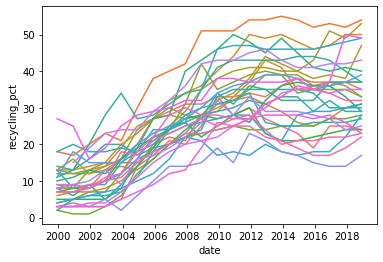

In [1231]:
# let's inspect the recycling_pct feature a bit more to better understand the trend and which interpolation method is most applicable
# for this exercise, I will initialize a new dataframe df_recycle
df_recycle = df_annual_b[['date','area','recycling_pct']]
sns.lineplot(data = df_recycle, x = 'date', y = 'recycling_pct', hue = 'area', legend = False)

# interesting, seemingly cyclical, trend here.. linear ramp up followed by a plateau/slight regression from 2010-2016 and now, it appears as though the trend is ramping higher again
# I'll go ahead and interpolate forward using various statistical methods in the next cell
# We will need to go ahead and weight the interpolation based on the most recent values, so linear won't work, but I will include it for the sake of comparison

In [1232]:
df_recycle['linear'] = df_recycle['recycling_pct']
df_recycle['quadratic'] = df_recycle['recycling_pct']
df_recycle['cubic'] = df_recycle['recycling_pct']
df_recycle['spline'] = df_recycle['recycling_pct']
df_recycle['nearest'] = df_recycle['recycling_pct']
df_recycle['polynomial'] = df_recycle['recycling_pct']

df_recycle.linear.interpolate(method = 'linear', limit_direction = 'both', limit_area=None, inplace = True)
df_recycle.quadratic.interpolate(method = 'quadratic', limit_direction = 'both', limit_area=None, inplace = True)
df_recycle.cubic.interpolate(method = 'cubic', limit_direction = 'both', inplace = True)
df_recycle.spline.interpolate(method = 'spline', limit_direction = 'both', inplace = True, order = 2)
df_recycle.nearest.interpolate(method = 'nearest', limit_direction = 'both', inplace = True)
df_recycle.polynomial.interpolate(method = 'polynomial', limit_direction = 'both', inplace = True, order = 3)
print(df_recycle.dtypes)
print(df_recycle.loc[df_recycle.area == "bexley"][['date','linear','quadratic','cubic','spline','nearest','polynomial']])


date             datetime64[ns]
area                     object
recycling_pct           float64
linear                  float64
quadratic               float64
cubic                   float64
spline                  float64
nearest                 float64
polynomial              float64
dtype: object
           date  linear  quadratic  cubic        spline  nearest  polynomial
3    1999-12-01    18.0       18.0   18.0     18.000000     18.0        18.0
54   2000-12-01    17.0       17.0   17.0     17.000000     17.0        17.0
105  2001-12-01    20.0       20.0   20.0     20.000000     20.0        20.0
156  2002-12-01    23.0       23.0   23.0     23.000000     23.0        23.0
207  2003-12-01    21.0       21.0   21.0     21.000000     21.0        21.0
258  2004-12-01    30.0       30.0   30.0     30.000000     30.0        30.0
309  2005-12-01    38.0       38.0   38.0     38.000000     38.0        38.0
360  2006-12-01    40.0       40.0   40.0     40.000000     40.0        40.0
411  